In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime 
df_cal = pd.read_csv('./calendar.csv')
df_lis = pd.read_csv('./listings.csv')
df_cal.head()


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [138]:

df_cal.shape

(1308890, 4)

In [139]:
#check if there are any null date values 
df_cal["date"].isnull().value_counts()

False    1308890
Name: date, dtype: int64

In [140]:
month_lst = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December']
#converts the month portion to a string based on the month_lst list  
def month_to_str (month):
    '''
    INPUT :
    the month in an integer 
    
    OUTPUT:
    returns the name of the month in string 
    '''
    month_name = month_lst[month - 1]
    
    return month_name 
    
df_cal["month_num"] = (pd.DatetimeIndex(df_cal["date"])).month


In [141]:


df_cal["month"] = df_cal["month_num"].apply(month_to_str) 

In [142]:
def available_to_int (state):
    if state == "t":
        return 1 
    else:
        return 0 
    
df_cal["_isavailable"]  = df_cal["available"].apply(available_to_int)    

In [143]:
df_cal.head()

,listing_id,date,available,price,month_num,month,_isavailable
0,12147973,2017-09-05,f,NaN,9,September,0
1,12147973,2017-09-04,f,NaN,9,September,0
2,12147973,2017-09-03,f,NaN,9,September,0
3,12147973,2017-09-02,f,NaN,9,September,0
4,12147973,2017-09-01,f,NaN,9,September,0


/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


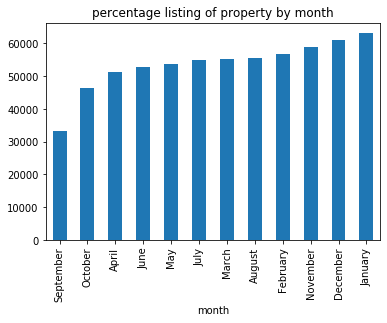

In [144]:
df_cal.groupby(["month" ]).sum()["_isavailable"].sort_values().plot("bar"  ,\
                                                                     title  = "percentage listing of property by month")

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


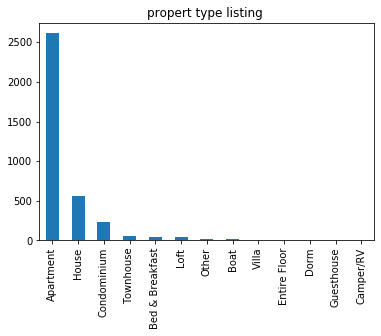

In [145]:
df_lis["property_type"].value_counts().plot("bar" ,  title = "propert type listing ")